Section one verifies random number generation with IID Gaussians
    Gumbal Distribution
    root 2 ln(n)
    
Section two verifies the brownian bridge
    Gumbal Distribution
    Fixed S
    

# Standard Gaussians

In order to verify the validity of the data we have generated we will show that it coroborates with known theoretical results. This section shows that our random number generation is unbiased using two methods. The first will graph the random variable defined as the maxima of standard normal process minus the expected value of that process. The second will show 

In [13]:
import numpy as np
import pandas as pd

# For plotting data
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [140]:
File = r"C:\Users\Ben\Desktop\REU Python\DataVis\Data\MaxDist\30000_5000_standard_normal_maxima.csv"

In [141]:
colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData = list(data['max'])
M = data['exp'][0]

In [142]:
MaxNorm = []

for w in range(len(MaxData)):
    MaxNorm.append(MaxData[w]/len(MaxData))

In [143]:
Diff = []

for x in range(len(MaxData)):
    Diff.append(MaxData[x] - M)

### Regression

In [156]:
# parameters for the pdf of limiting distribution of EM_n
n=30000

def a(n):
    return pow(2*np.log(n), -0.5)

def b(n):
    return np.sqrt(2*np.log(n)) - 0.5*pow(2*np.log(n), -0.5)*(np.log(np.log(n))+np.log(4*np.pi))

def pdf(x,n):
    return a(n)*np.exp(a(n)*(b(n)-x)-np.exp(a(n)*(b(n)-x)))

### Graphing

In [157]:
X = np.arange(0, 10,.01)

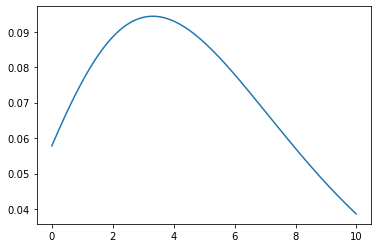

In [158]:
plt.plot(X, pdf(X,2000))

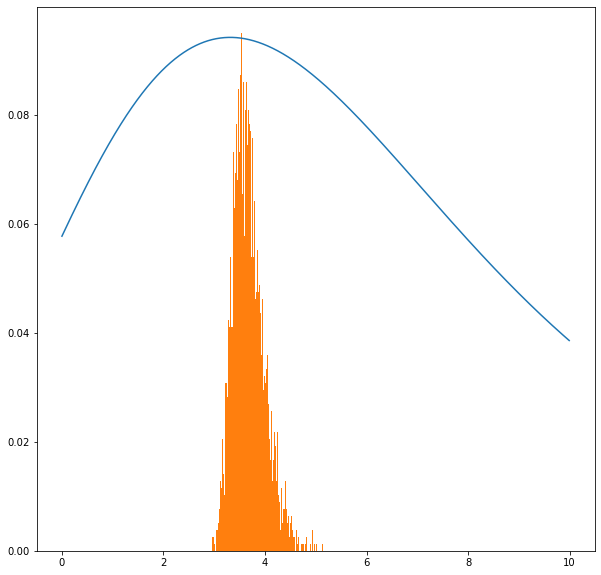

In [169]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

# ax1.hist(x=MaxData, bins=int(np.floor(len(MaxData)*.05)))
ax1.plot(X, pdf(X,2000))

(counts, bins) = np.histogram(MaxData, bins=int(np.floor((len(MaxData)/20))))

factor = (1/70)*0.09
plt.hist(bins[:-1], bins, weights=factor*counts)
plt.show()

plt.show()

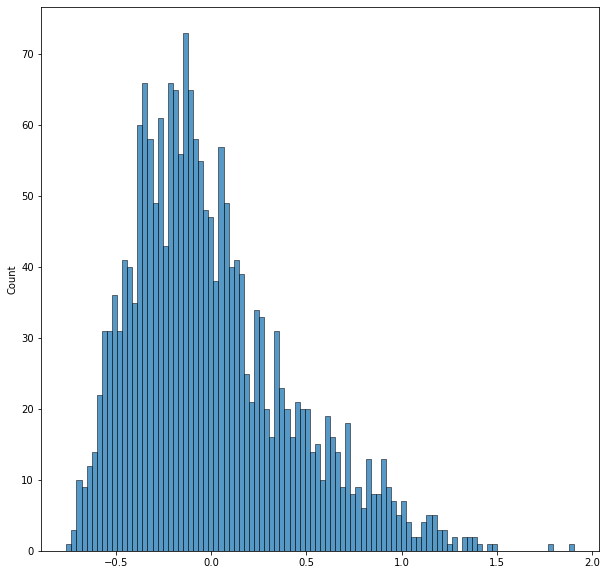

In [136]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

sns.histplot(data=Diff, bins=int(np.floor(len(MaxData)*.05)))

plt.show()

### Expected Value as n Increases
We know from Leadbetter et. al. that if $(X_n)_{n\in\mathbb{N}}$ is a sequence of $\mathcal{N}(0,1)$
i.i.d variables and $M_n=\max_{0\leq j\leq n}X_j$, then
$$
\mathbb{E}M_n \approx \sqrt(2\log(n)-\frac{1}{2}(2\log(n))^{-\frac{1}{2}}(\log\log(n)+\log(4\pi))
$$
Using this, we can plot and compare the empirical value of $\mathbb{E}M_n$ against the known
theoretical value. As it turns out, the empirical data that we generated agrees with the theory.

In [121]:
File = r'C:\Users\Ben\Desktop\REU Python\DataVis\Data\MaxDist\gaussian_expected_maxima50000.csv'

In [124]:
colnames=['n', 'exp'] 
data = pd.read_csv(File, names=colnames)

EXP = np.array(data['exp'])
N = np.array(data['n'])

In [126]:
def rootlog(x):
    return np.sqrt(2*np.log(x))

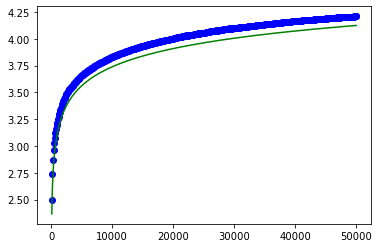

In [139]:
plt.scatter(N,EXP,c='blue')
plt.plot(N,b(N),c='green')

# Brownian Bridge

In [76]:
File = r'C:\Users\Ben\Desktop\REU Python\DataVis\Data\MaxDist\2500_0.500000.csv'

In [77]:
colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData = list(data['max'])
M = data['exp'][0]

In [78]:
Diff = []

for x in range(len(MaxData)):
    Diff.append(MaxData[x] - M)

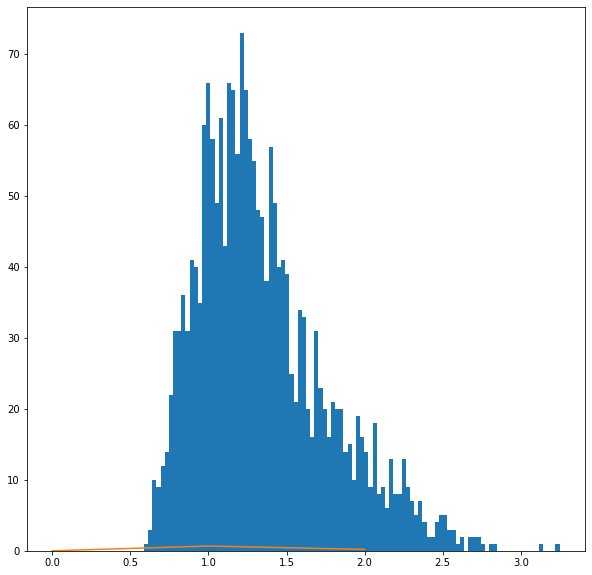

In [84]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

ax1.hist(x=MaxData, bins=int(np.floor(len(MaxData)*.05)))
ax1.plot(P, BPDF(P))
plt.show()

In [80]:
def BPDF(x):
    return (4*x/np.pi)*np.exp((-2*x**2)/(np.pi))

In [83]:
P = [x for x in range(0,3)]

P = np.array(P)

In [179]:
address = 'C:\\Users\\Ben\\Desktop\\REU Python\\DataVis\\Data\\Maxima'

In [180]:
# min N, Max N, step-size
N_Data = ['500','1950','10']

# min S, max S, step-size
S_Data = ['0.0','0.5','.001']

# creates a variable for the .format() function which call specified files in \Maxima
Folder = address + '\\{}_s0.0-0.5.csv'

In [181]:
# For some reason trying to create mlist in the function above breaks things
nlist = []
slist = []
mlist = []

for n in range(int(N_Data[0]), int(N_Data[1])+int(N_Data[2]), int(N_Data[2])):
    filenew = Folder.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    nlist.append(list(numbers['n']))
    slist.append(list(numbers['s']))
    mlist.append(list(numbers['m']))

In [182]:
S = .5

In [183]:
# The index function tells us the index of our S value so we can ensure a proper zip with the future m values
Index = slist[0].index(S)

In [184]:
nFixed = []
mFixed = []

for s in range(len(slist)):
    if S in slist[s]:
        nFixed.append(nlist[s][Index])
        mFixed.append(mlist[s][Index])
        
nFixed = np.array(nFixed)
mFixed = np.array(mFixed)

In [195]:
def ass(x):
    return np.sqrt(np.pi/2)*np.pi/(2*np.sqrt(2))

asss = []

for x in range(len(nFixed)):
    asss.append(ass(x))

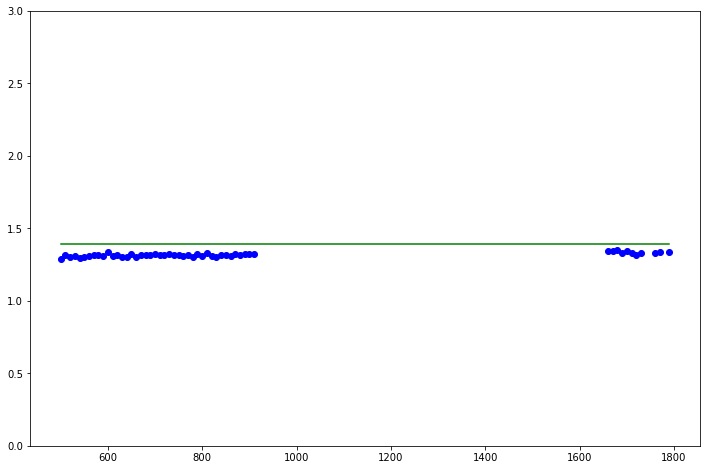

In [196]:
%matplotlib inline
f = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)
ax1.set_ylim(0,int(np.ceil(max(mFixed)))+1)

ax1.scatter(nFixed, mFixed, c='blue')
ax1.plot(nFixed, asss, c='green')
